apply a scaler
look at correlation
feature selection / pca
visualizations

train and test models
evaluate and compare models
visualization of model performance
do writeups

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('cleaned_training_df.csv', index_col=[0])

In [3]:
scores = pd.read_csv('target_df.csv', index_col=[0])

In [4]:
scores.value_counts()

Credit_Score
Standard        53174
Poor            28998
Good            17828
dtype: int64

In [5]:
scores_factors = scores.replace({'Good':2,'Standard':1,'Poor':0})

In [6]:
df.shape

(100000, 48)

In [7]:
df.dtypes

Age                                                    int64
Income                                               float64
Num_Bank_Accounts                                      int64
Num_Credit_Card                                        int64
Interest_Rate                                          int64
Num_of_Loan                                            int64
Days_delayed                                           int64
Num_of_Delayed_Payment                               float64
Limit_changed                                        float64
Inquiries                                            float64
Outstanding_Debt                                     float64
Credit_Utilization_Ratio                             float64
Credit_History_Age                                   float64
EMI                                                  float64
Amount_invested_monthly                              float64
Monthly_Balance                                      float64
Not Specified           

In [8]:
df.describe()

,Age,Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Days_delayed,Num_of_Delayed_Payment,Limit_changed,Inquiries,...,Job_Writer,Credit_Mix_Good,Credit_Mix_Standard,Min_Amt_Paid_No,Min_Amt_Paid_Yes,Payment_Behavior_High_spent_Medium_value_payments,Payment_Behavior_High_spent_Small_value_payments,Payment_Behavior_Low_spent_Large_value_payments,Payment_Behavior_Low_spent_Medium_value_payments,Payment_Behavior_Low_spent_Small_value_payments
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.310680,50505.123449,5.368870,5.533680,14.53208,3.532880,21.068780,13.334060,10.374345,5.766949,...,0.063040,0.302250,0.461700,0.356670,0.523260,0.189110,0.117710,0.107680,0.144140,0.292250
std,10.764736,38299.422093,2.593286,2.067126,8.74133,2.446356,14.860104,6.264674,6.742179,3.835971,...,0.243036,0.459235,0.498533,0.479019,0.499461,0.391598,0.322266,0.309977,0.351233,0.454799
min,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,-5.000000,0.000000,-6.490000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.340000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,56.000000,179987.280000,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,29.980000,17.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.corr()

,Age,Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Days_delayed,Num_of_Delayed_Payment,Limit_changed,Inquiries,...,Job_Writer,Credit_Mix_Good,Credit_Mix_Standard,Min_Amt_Paid_No,Min_Amt_Paid_Yes,Payment_Behavior_High_spent_Medium_value_payments,Payment_Behavior_High_spent_Small_value_payments,Payment_Behavior_Low_spent_Large_value_payments,Payment_Behavior_Low_spent_Medium_value_payments,Payment_Behavior_Low_spent_Small_value_payments
Age,1.000000,0.091524,-0.190407,-0.148560,-0.217531,-0.213503,-0.174159,-0.184276,-0.157035,-0.251923,...,-0.001007,0.214920,-0.041211,0.244189,-0.229879,0.014147,-0.000213,0.003667,0.001481,-0.032909
Income,0.091524,1.000000,-0.284049,-0.217854,-0.302352,-0.255560,-0.250163,-0.286012,-0.175414,-0.281388,...,0.003674,0.307658,-0.066250,0.278043,-0.268284,0.084959,-0.012592,-0.029679,0.039463,-0.278903
Num_Bank_Accounts,-0.190407,-0.284049,1.000000,0.442656,0.584302,0.472493,0.560270,0.601361,0.331254,0.519908,...,0.014417,-0.633034,0.109251,-0.526988,0.505550,-0.027353,-0.007765,0.001070,-0.004621,0.088364
Num_Credit_Card,-0.148560,-0.217854,0.442656,1.000000,0.497914,0.417966,0.479570,0.423581,0.252539,0.460570,...,0.006144,-0.382250,-0.091430,-0.374878,0.359989,-0.018610,0.000421,-0.000572,-0.006301,0.066356
Interest_Rate,-0.217531,-0.302352,0.584302,0.497914,1.000000,0.559156,0.589088,0.571457,0.366691,0.634386,...,0.006165,-0.611033,0.025359,-0.573132,0.546340,-0.028209,-0.002468,-0.003718,-0.002741,0.095067
Num_of_Loan,-0.213503,-0.255560,0.472493,0.417966,0.559156,1.000000,0.501243,0.474723,0.369624,0.566679,...,-0.000257,-0.416001,-0.164426,-0.467413,0.449029,-0.031277,0.000818,-0.007557,-0.003048,0.086560
Days_delayed,-0.174159,-0.250163,0.560270,0.479570,0.589088,0.501243,1.000000,0.542321,0.293227,0.540920,...,0.002601,-0.490118,-0.104402,-0.459469,0.439825,-0.023445,-0.002666,0.001484,-0.008667,0.080272
Num_of_Delayed_Payment,-0.184276,-0.286012,0.601361,0.423581,0.571457,0.474723,0.542321,1.000000,0.325942,0.501313,...,0.001882,-0.656253,0.102628,-0.536710,0.513821,-0.028143,-0.000747,-0.001380,-0.001607,0.084336
Limit_changed,-0.157035,-0.175414,0.331254,0.252539,0.366691,0.369624,0.293227,0.325942,1.000000,0.381371,...,0.007207,-0.410052,0.129481,-0.459024,0.440303,-0.013225,0.002165,-0.001114,-0.008682,0.051439
Inquiries,-0.251923,-0.281388,0.519908,0.460570,0.634386,0.566679,0.540920,0.501313,0.381371,1.000000,...,0.004042,-0.507305,-0.036333,-0.572616,0.548021,-0.030779,-0.003432,-0.003140,-0.000291,0.091165


In [10]:
merged_df = pd.concat([df,scores] , axis=1)

In [11]:
merged_df.head()

,Age,Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Days_delayed,Num_of_Delayed_Payment,Limit_changed,Inquiries,...,Credit_Mix_Good,Credit_Mix_Standard,Min_Amt_Paid_No,Min_Amt_Paid_Yes,Payment_Behavior_High_spent_Medium_value_payments,Payment_Behavior_High_spent_Small_value_payments,Payment_Behavior_Low_spent_Large_value_payments,Payment_Behavior_Low_spent_Medium_value_payments,Payment_Behavior_Low_spent_Small_value_payments,Credit_Score
0,23,19114.12,3,4,3,4,3,7.0,11.27,4.0,...,1,0,1,0,0,1,0,0,0,Good
1,23,19114.12,3,4,3,4,-1,6.5,11.27,4.0,...,1,0,1,0,0,0,1,0,0,Good
2,23,19114.12,3,4,3,4,3,7.0,11.27,4.0,...,1,0,1,0,0,0,0,1,0,Good
3,23,19114.12,3,4,3,4,5,4.0,6.27,4.0,...,1,0,1,0,0,0,0,0,1,Good
4,23,19114.12,3,4,3,4,6,6.5,11.27,4.0,...,1,0,1,0,1,0,0,0,0,Good


In [12]:
merged_df.corr()

,Age,Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Days_delayed,Num_of_Delayed_Payment,Limit_changed,Inquiries,...,Job_Writer,Credit_Mix_Good,Credit_Mix_Standard,Min_Amt_Paid_No,Min_Amt_Paid_Yes,Payment_Behavior_High_spent_Medium_value_payments,Payment_Behavior_High_spent_Small_value_payments,Payment_Behavior_Low_spent_Large_value_payments,Payment_Behavior_Low_spent_Medium_value_payments,Payment_Behavior_Low_spent_Small_value_payments
Age,1.000000,0.091524,-0.190407,-0.148560,-0.217531,-0.213503,-0.174159,-0.184276,-0.157035,-0.251923,...,-0.001007,0.214920,-0.041211,0.244189,-0.229879,0.014147,-0.000213,0.003667,0.001481,-0.032909
Income,0.091524,1.000000,-0.284049,-0.217854,-0.302352,-0.255560,-0.250163,-0.286012,-0.175414,-0.281388,...,0.003674,0.307658,-0.066250,0.278043,-0.268284,0.084959,-0.012592,-0.029679,0.039463,-0.278903
Num_Bank_Accounts,-0.190407,-0.284049,1.000000,0.442656,0.584302,0.472493,0.560270,0.601361,0.331254,0.519908,...,0.014417,-0.633034,0.109251,-0.526988,0.505550,-0.027353,-0.007765,0.001070,-0.004621,0.088364
Num_Credit_Card,-0.148560,-0.217854,0.442656,1.000000,0.497914,0.417966,0.479570,0.423581,0.252539,0.460570,...,0.006144,-0.382250,-0.091430,-0.374878,0.359989,-0.018610,0.000421,-0.000572,-0.006301,0.066356
Interest_Rate,-0.217531,-0.302352,0.584302,0.497914,1.000000,0.559156,0.589088,0.571457,0.366691,0.634386,...,0.006165,-0.611033,0.025359,-0.573132,0.546340,-0.028209,-0.002468,-0.003718,-0.002741,0.095067
Num_of_Loan,-0.213503,-0.255560,0.472493,0.417966,0.559156,1.000000,0.501243,0.474723,0.369624,0.566679,...,-0.000257,-0.416001,-0.164426,-0.467413,0.449029,-0.031277,0.000818,-0.007557,-0.003048,0.086560
Days_delayed,-0.174159,-0.250163,0.560270,0.479570,0.589088,0.501243,1.000000,0.542321,0.293227,0.540920,...,0.002601,-0.490118,-0.104402,-0.459469,0.439825,-0.023445,-0.002666,0.001484,-0.008667,0.080272
Num_of_Delayed_Payment,-0.184276,-0.286012,0.601361,0.423581,0.571457,0.474723,0.542321,1.000000,0.325942,0.501313,...,0.001882,-0.656253,0.102628,-0.536710,0.513821,-0.028143,-0.000747,-0.001380,-0.001607,0.084336
Limit_changed,-0.157035,-0.175414,0.331254,0.252539,0.366691,0.369624,0.293227,0.325942,1.000000,0.381371,...,0.007207,-0.410052,0.129481,-0.459024,0.440303,-0.013225,0.002165,-0.001114,-0.008682,0.051439
Inquiries,-0.251923,-0.281388,0.519908,0.460570,0.634386,0.566679,0.540920,0.501313,0.381371,1.000000,...,0.004042,-0.507305,-0.036333,-0.572616,0.548021,-0.030779,-0.003432,-0.003140,-0.000291,0.091165


<AxesSubplot:xlabel='Amount_invested_monthly', ylabel='Density'>

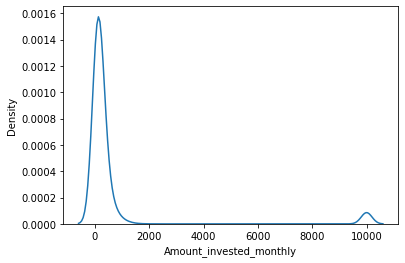

In [13]:
sns.kdeplot(df.Amount_invested_monthly)

In [14]:
merged_df

,Age,Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Days_delayed,Num_of_Delayed_Payment,Limit_changed,Inquiries,...,Credit_Mix_Good,Credit_Mix_Standard,Min_Amt_Paid_No,Min_Amt_Paid_Yes,Payment_Behavior_High_spent_Medium_value_payments,Payment_Behavior_High_spent_Small_value_payments,Payment_Behavior_Low_spent_Large_value_payments,Payment_Behavior_Low_spent_Medium_value_payments,Payment_Behavior_Low_spent_Small_value_payments,Credit_Score
0,23,19114.12,3,4,3,4,3,7.0,11.27,4.0,...,1,0,1,0,0,1,0,0,0,Good
1,23,19114.12,3,4,3,4,-1,6.5,11.27,4.0,...,1,0,1,0,0,0,1,0,0,Good
2,23,19114.12,3,4,3,4,3,7.0,11.27,4.0,...,1,0,1,0,0,0,0,1,0,Good
3,23,19114.12,3,4,3,4,5,4.0,6.27,4.0,...,1,0,1,0,0,0,0,0,1,Good
4,23,19114.12,3,4,3,4,6,6.5,11.27,4.0,...,1,0,1,0,1,0,0,0,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,4,6,7,2,23,7.0,11.50,3.0,...,1,0,1,0,0,0,0,0,0,Poor
99996,25,39628.99,4,6,7,2,18,7.0,11.50,3.0,...,1,0,1,0,1,0,0,0,0,Poor
99997,25,39628.99,4,6,7,2,27,6.0,11.50,3.0,...,1,0,1,0,0,0,0,0,0,Poor
99998,25,39628.99,4,6,7,2,20,6.0,11.50,3.0,...,1,0,1,0,0,0,1,0,0,Standard


In [15]:
factorized_target_df = merged_df.copy()

In [16]:
factorized_target_df['Credit_Score'] = factorized_target_df['Credit_Score'].replace({'Good':2,'Standard':1,'Poor':0})

In [523]:
factors = df.copy()

In [524]:
factors.columns

Index(['Age', 'Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Days_delayed',
       'Num_of_Delayed_Payment', 'Limit_changed', 'Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'EMI', 'Amount_invested_monthly', 'Monthly_Balance', 'Not Specified',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Personal Loan',
       'Payday Loan', 'Mortgage Loan', 'Student Loan', 'Home Equity Loan',
       'Auto Loan', 'Job_Architect', 'Job_Developer', 'Job_Doctor',
       'Job_Engineer', 'Job_Entrepreneur', 'Job_Journalist', 'Job_Lawyer',
       'Job_Manager', 'Job_Mechanic', 'Job_Media_Manager', 'Job_Musician',
       'Job_Scientist', 'Job_Teacher', 'Job_Writer', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Min_Amt_Paid_No', 'Min_Amt_Paid_Yes',
       'Payment_Behavior_High_spent_Medium_value_payments',
       'Payment_Behavior_High_spent_Small_value_payments',
       'Payment_Behavior_Low_spent_La

In [525]:
factors.drop(columns=['Job_Architect', 'Job_Developer', 'Job_Doctor',
       'Job_Engineer', 'Job_Entrepreneur', 'Job_Journalist', 'Job_Lawyer',
       'Job_Manager', 'Job_Mechanic', 'Job_Media_Manager', 'Job_Musician',
       'Job_Scientist', 'Job_Teacher', 'Job_Writer','Payment_Behavior_High_spent_Medium_value_payments',
       'Payment_Behavior_High_spent_Small_value_payments',
       'Payment_Behavior_Low_spent_Large_value_payments',
       'Payment_Behavior_Low_spent_Medium_value_payments',
       'Payment_Behavior_Low_spent_Small_value_payments'], inplace=True)

In [526]:
factors.columns

Index(['Age', 'Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Days_delayed',
       'Num_of_Delayed_Payment', 'Limit_changed', 'Inquiries',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'EMI', 'Amount_invested_monthly', 'Monthly_Balance', 'Not Specified',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Personal Loan',
       'Payday Loan', 'Mortgage Loan', 'Student Loan', 'Home Equity Loan',
       'Auto Loan', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Min_Amt_Paid_No', 'Min_Amt_Paid_Yes'],
      dtype='object')

In [527]:
factors.shape

(100000, 29)

In [17]:
corr_scores = factorized_target_df.corr()

In [18]:
Credit_Score_correlations = corr_scores[['Credit_Score']]

In [19]:
Credit_Score_correlations.sort_values('Credit_Score',ascending=False)

,Credit_Score
Credit_Score,1.000000
Credit_Mix_Good,0.429567
Min_Amt_Paid_No,0.398371
Credit_History_Age,0.388789
Income,0.212606
Monthly_Balance,0.208517
Age,0.160353
Credit_Utilization_Ratio,0.045793
Payment_Behavior_High_spent_Medium_value_payments,0.039314
Job_Media_Manager,0.013734


In [20]:
print('Highest Correlated Factors to Credit Score')
print(Credit_Score_correlations.sort_values('Credit_Score',ascending=False)[1:11])

Highest Correlated Factors to Credit Score
                                                   Credit_Score
Credit_Mix_Good                                        0.429567
Min_Amt_Paid_No                                        0.398371
Credit_History_Age                                     0.388789
Income                                                 0.212606
Monthly_Balance                                        0.208517
Age                                                    0.160353
Credit_Utilization_Ratio                               0.045793
Payment_Behavior_High_spent_Medium_value_payments      0.039314
Job_Media_Manager                                      0.013734
Payment_Behavior_High_spent_Small_value_payments       0.013137


In [21]:
print('Highest Negatively Correlated Factors to Credit Score')
print(Credit_Score_correlations.sort_values('Credit_Score').head(10))

Highest Negatively Correlated Factors to Credit Score
                        Credit_Score
Interest_Rate              -0.485409
Inquiries                  -0.436318
Days_delayed               -0.431591
Num_Credit_Card            -0.404421
Num_Bank_Accounts          -0.388172
Outstanding_Debt           -0.386525
Min_Amt_Paid_Yes           -0.384088
Num_of_Delayed_Payment     -0.372976
Num_of_Loan                -0.358355
Limit_changed              -0.169832


<AxesSubplot:>

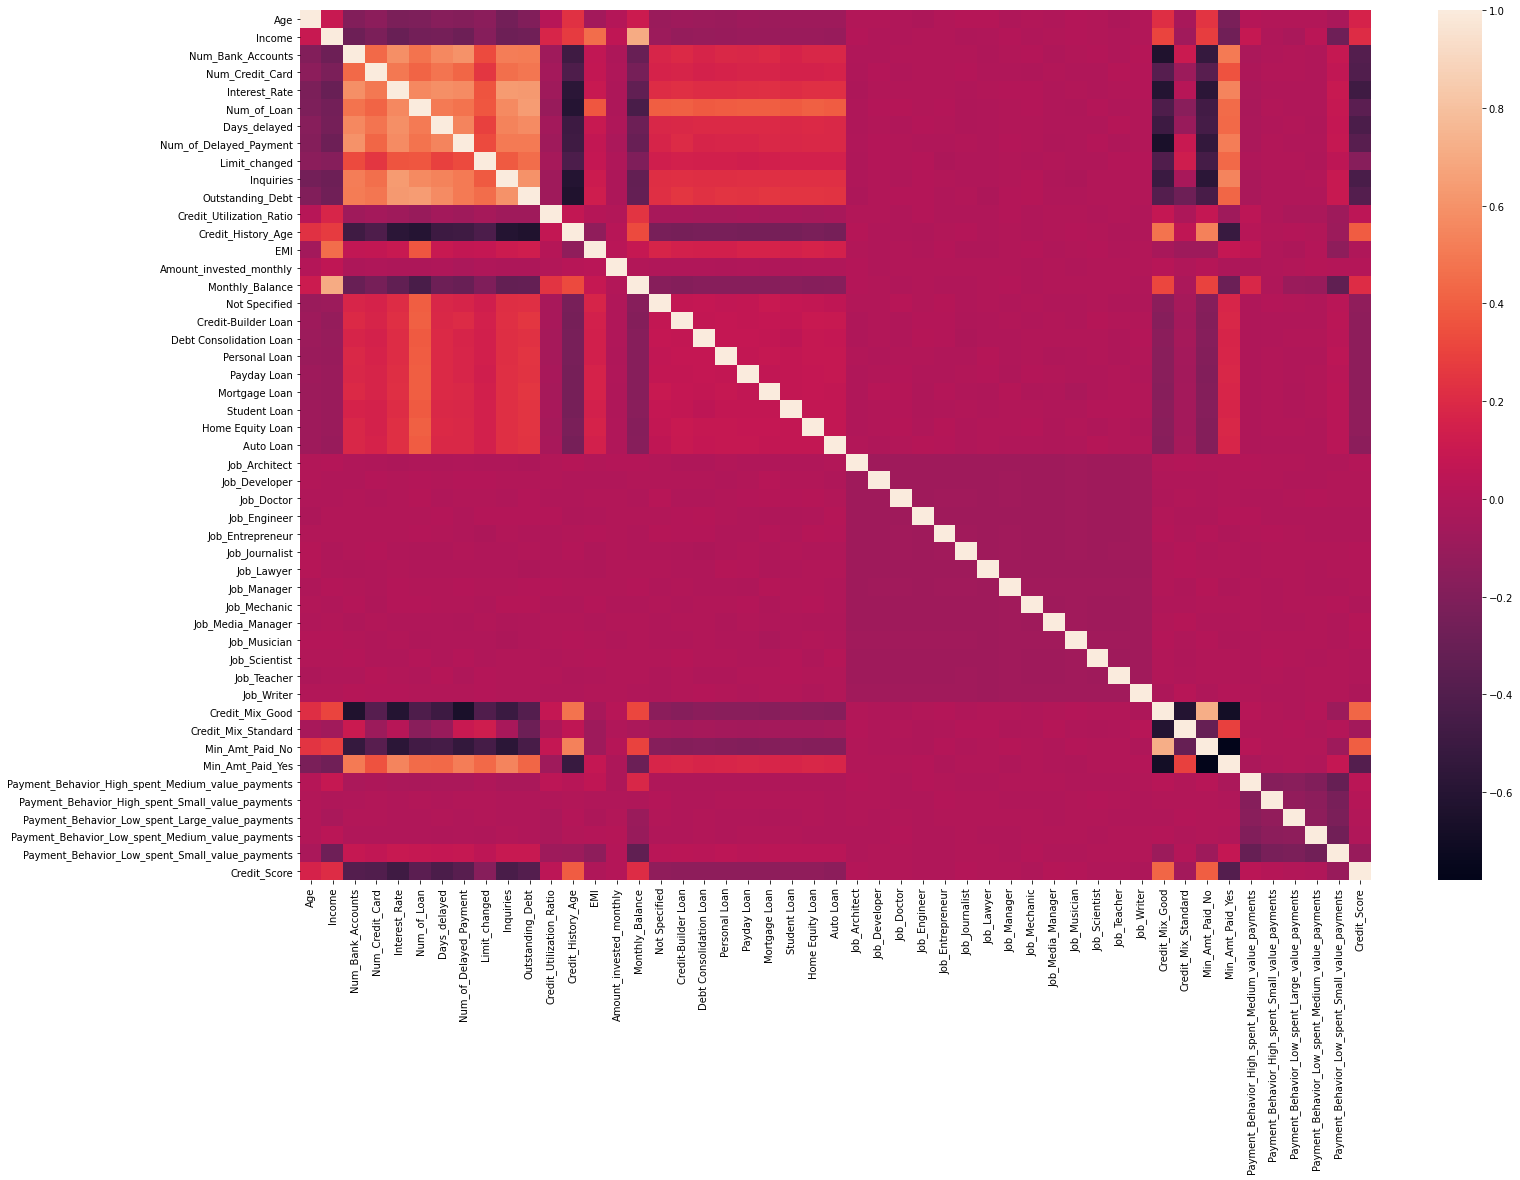

In [22]:
plt.figure(figsize=(24,16))
sns.heatmap(corr_scores)

<AxesSubplot:>

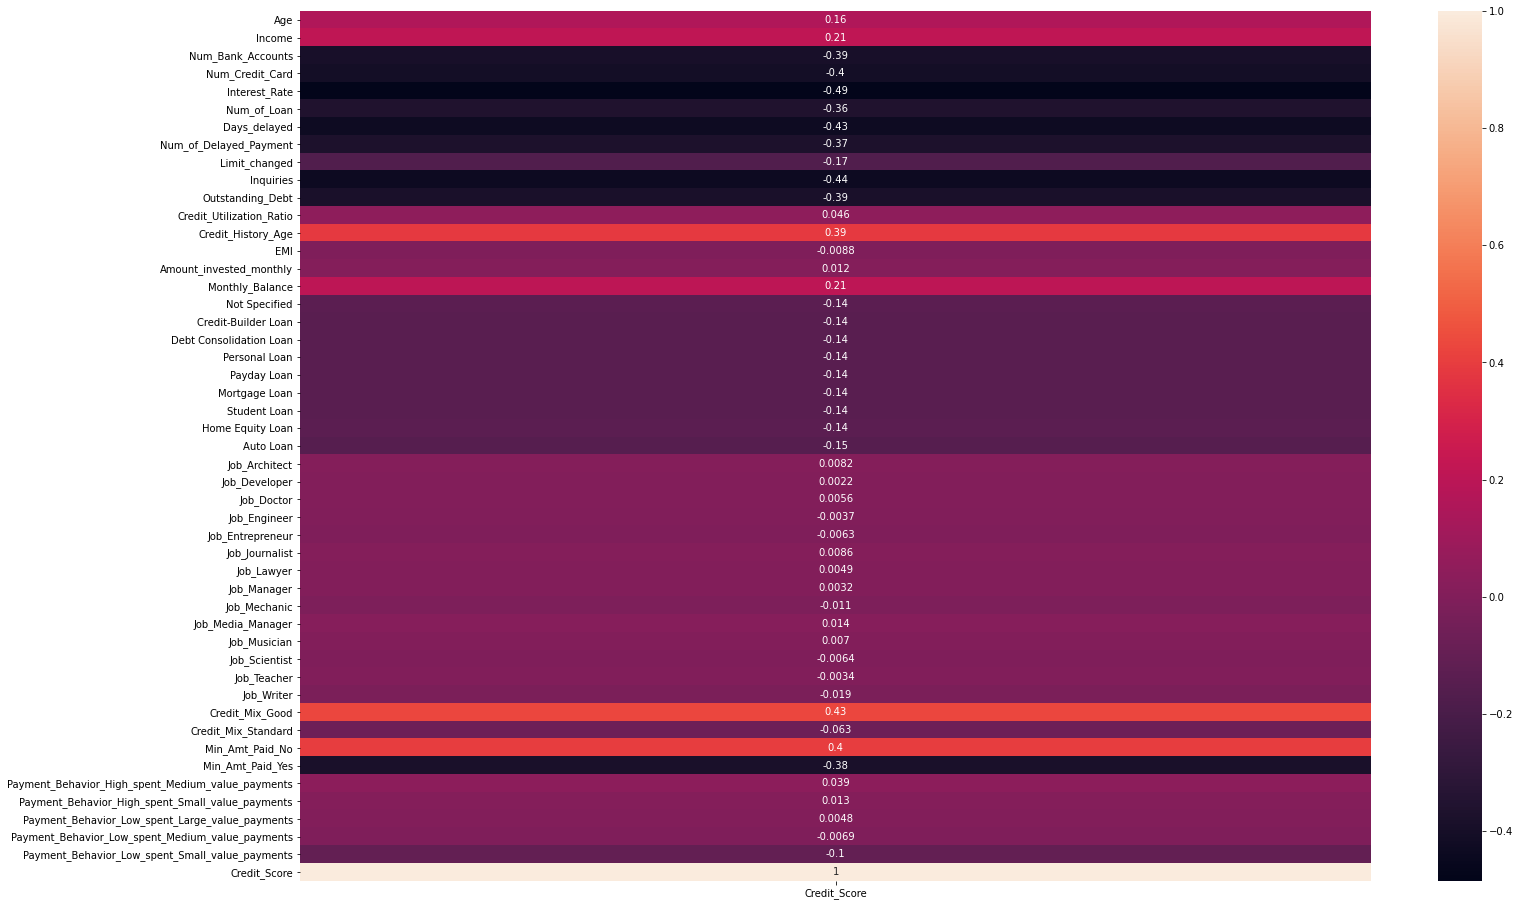

In [23]:
plt.figure(figsize=(24,16))
sns.heatmap(Credit_Score_correlations, annot=True)

In [24]:
mm_scaler = preprocessing.MinMaxScaler() #MinMaxScaler preserves shape of distribution
r_scaler = preprocessing.RobustScaler() #Use RobustScaler to reduce the effects of outliers, relative to MinMaxScaler.
s_scaler = preprocessing.StandardScaler() #StandardScalerscales each column to have 0 mean and unit variance.
power_transformer = preprocessing.PowerTransformer() #  power transform featurewise to make data more Gaussian-like

In [25]:
from sklearn.compose import ColumnTransformer

In [27]:
col_list = df.columns
list(col_list)

['Age',
 'Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Days_delayed',
 'Num_of_Delayed_Payment',
 'Limit_changed',
 'Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'EMI',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Not Specified',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Personal Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Student Loan',
 'Home Equity Loan',
 'Auto Loan',
 'Job_Architect',
 'Job_Developer',
 'Job_Doctor',
 'Job_Engineer',
 'Job_Entrepreneur',
 'Job_Journalist',
 'Job_Lawyer',
 'Job_Manager',
 'Job_Mechanic',
 'Job_Media_Manager',
 'Job_Musician',
 'Job_Scientist',
 'Job_Teacher',
 'Job_Writer',
 'Credit_Mix_Good',
 'Credit_Mix_Standard',
 'Min_Amt_Paid_No',
 'Min_Amt_Paid_Yes',
 'Payment_Behavior_High_spent_Medium_value_payments',
 'Payment_Behavior_High_spent_Small_value_payments',
 'Payment_Behavior_Low_spent_Large_value_payments',
 'Payment_Behavior_Low_spent_Medium_va

In [28]:
for col in col_list:
    print(col)
    print(df[col].skew())

Age
0.15633507310981037
Income
1.130222566741384
Num_Bank_Accounts
-0.1900199282068239
Num_Credit_Card
0.22587865634022267
Interest_Rate
0.4962318996645298
Num_of_Loan
0.44560852324073413
Days_delayed
0.9663945487340571
Num_of_Delayed_Payment
-0.18640549630745593
Limit_changed
0.6083616176748599
Inquiries
0.3797136139535176
Outstanding_Debt
1.2075361955699684
Credit_Utilization_Ratio
0.02861652613497035
Credit_History_Age
-0.04882822616302334
EMI
3.628053049754713
Amount_invested_monthly
4.435777197013809
Monthly_Balance
1.5854617212791502
Not Specified
0.7875814238735207
Credit-Builder Loan
0.785199357452915
Debt Consolidation Loan
0.819625309101095
Personal Loan
0.8163967454331216
Payday Loan
0.7745156502148519
Mortgage Loan
0.8035367677686479
Student Loan
0.8196253091010951
Home Equity Loan
0.8015351502034753
Auto Loan
0.8440170884960055
Job_Architect
3.4245804643691713
Job_Developer
3.4573620213541734
Job_Doctor
3.5065654065833334
Job_Engineer
3.4121565804018106
Job_Entrepreneur
3.

In [29]:
clmi = list(range(0,48))

In [30]:
clmi.remove(14)

In [31]:
ct = ColumnTransformer([("minmax", mm_scaler, clmi),("robust", r_scaler, [14])])
X_trans = ct.fit_transform(df)  

In [32]:
X_trans

array([[ 0.21428571,  0.06999708,  0.27272727, ...,  0.        ,
         0.        , -0.29678512],
       [ 0.21428571,  0.06999708,  0.27272727, ...,  0.        ,
         0.        , -0.09524234],
       [ 0.21428571,  0.06999708,  0.27272727, ...,  1.        ,
         0.        , -0.2899496 ],
       ...,
       [ 0.26190476,  0.18859293,  0.36363636, ...,  0.        ,
         0.        , -0.59691395],
       [ 0.26190476,  0.18859293,  0.36363636, ...,  0.        ,
         0.        ,  0.61476214],
       [ 0.26190476,  0.18859293,  0.36363636, ...,  0.        ,
         0.        ,  0.16494952]])

In [528]:
clmi2 = list(range(0,29))

In [529]:
clmi2=np.delete(clmi2, [13,14])

In [530]:
clmi2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [599]:
ct = ColumnTransformer([("minmax", mm_scaler, clmi2),("robust", r_scaler, [13,14])])
X_trans2 = ct.fit_transform(factors)  

In [532]:
X_trans2.shape

(100000, 29)

In [615]:
X_trans3 = mm_scaler.fit_transform(factors)

In [616]:
X_trans4 = r_scaler.fit_transform(factors)

In [625]:
X_trans5=s_scaler.fit_transform(factors)
X_trans6=power_transformer.fit_transform(factors)

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [36]:
oversampler = SMOTE(sampling_strategy='auto')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, scores_factors, test_size=0.5, random_state=42)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, scores, test_size=0.33, random_state=42)

In [81]:
X, y = oversampler.fit_resample(X_train, y_train)

In [39]:
X1, y1 = oversampler.fit_resample(X_trans_2, scores)

In [554]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [648]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_trans2, scores_factors, test_size=0.2, random_state=42, stratify=scores_factors)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [608]:
log_balanced = LogisticRegression(max_iter=1000, class_weight='balanced') 
log = LogisticRegression(max_iter=1000)

In [44]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(log.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [573]:
model1 = log_balanced.fit(X, y.values.ravel())

In [574]:
predictions1 = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions1))
print(classification_report(y_test, predictions1))

Accuracy: 0.66524
              precision    recall  f1-score   support

           0       0.63      0.68      0.66     14461
           1       0.81      0.60      0.69     26576
           2       0.50      0.83      0.63      8963

    accuracy                           0.67     50000
   macro avg       0.65      0.70      0.66     50000
weighted avg       0.70      0.67      0.67     50000



In [47]:
model2 = log_balanced.fit(X_train1, y_train1.values.ravel())

In [48]:
predictions2 = model2.predict(X_test1)
print("Accuracy:", accuracy_score(y_test1, predictions2))
print(classification_report(y_test1, predictions2))

Accuracy: 0.7053929297342477
              precision    recall  f1-score   support

        Good       0.70      0.83      0.76     17491
        Poor       0.75      0.68      0.72     17613
    Standard       0.66      0.60      0.63     17539

    accuracy                           0.71     52643
   macro avg       0.71      0.71      0.70     52643
weighted avg       0.71      0.71      0.70     52643



In [637]:
model3 = log_balanced.fit(X_train2, y_train2.values.ravel())

In [638]:
predictions3 = model3.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, predictions3))
print(classification_report(y_test2, predictions3))

Accuracy: 0.6637
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      5799
           1       0.81      0.60      0.69     10635
           2       0.50      0.84      0.62      3566

    accuracy                           0.66     20000
   macro avg       0.65      0.70      0.66     20000
weighted avg       0.70      0.66      0.67     20000



In [51]:
model4 = log.fit(X, y.values.ravel())

In [52]:
predictions4 = model4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions4))
print(classification_report(y_test, predictions4))

Accuracy: 0.6644242424242425
              precision    recall  f1-score   support

        Good       0.50      0.83      0.62      5866
        Poor       0.64      0.68      0.66      9633
    Standard       0.81      0.60      0.69     17501

    accuracy                           0.66     33000
   macro avg       0.65      0.70      0.66     33000
weighted avg       0.70      0.66      0.67     33000



In [53]:
model5 = log.fit(X_train1, y_train1.values.ravel())

In [54]:
predictions5 = model5.predict(X_test1)
print("Accuracy:", accuracy_score(y_test1, predictions5))
print(classification_report(y_test1, predictions5))

Accuracy: 0.7053739338563532
              precision    recall  f1-score   support

        Good       0.70      0.83      0.76     17491
        Poor       0.75      0.68      0.72     17613
    Standard       0.66      0.60      0.63     17539

    accuracy                           0.71     52643
   macro avg       0.71      0.71      0.70     52643
weighted avg       0.71      0.71      0.70     52643



In [611]:
model6 = log.fit(X_train2, y_train2.values.ravel())

In [612]:
predictions6 = model6.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, predictions6))
print(classification_report(y_test2, predictions6))

Accuracy: 0.6637
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      5799
           1       0.71      0.72      0.71     10635
           2       0.56      0.68      0.62      3566

    accuracy                           0.66     20000
   macro avg       0.64      0.65      0.64     20000
weighted avg       0.67      0.66      0.66     20000



In [571]:
rf_balanced = RandomForestClassifier(class_weight='balanced')
rf = RandomForestClassifier()

In [84]:
rf1 = rf_balanced.fit(X, y.values.ravel())

In [85]:
rf_predictions1 = rf1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions1))
print(classification_report(y_test, rf_predictions1))

Accuracy: 0.79716
              precision    recall  f1-score   support

           0       0.77      0.84      0.81     14461
           1       0.84      0.78      0.81     26576
           2       0.72      0.79      0.75      8963

    accuracy                           0.80     50000
   macro avg       0.78      0.80      0.79     50000
weighted avg       0.80      0.80      0.80     50000



In [60]:
rf2 = rf_balanced.fit(X_train1, y_train1.values.ravel())

In [61]:
rf_predictions2 = rf2.predict(X_test1)
print("Accuracy:", accuracy_score(y_test1, rf_predictions2))
print(classification_report(y_test1, rf_predictions2))

Accuracy: 0.8717588283342514
              precision    recall  f1-score   support

        Good       0.89      0.94      0.91     17491
        Poor       0.87      0.90      0.88     17613
    Standard       0.86      0.78      0.82     17539

    accuracy                           0.87     52643
   macro avg       0.87      0.87      0.87     52643
weighted avg       0.87      0.87      0.87     52643



In [649]:
rf3 = rf_balanced.fit(X_train2, y_train2.values.ravel())

In [650]:
rf_predictions3 = rf3.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, rf_predictions3))
print(classification_report(y_test2, rf_predictions3))

Accuracy: 0.8137
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5799
           1       0.83      0.82      0.83     10635
           2       0.79      0.75      0.77      3566

    accuracy                           0.81     20000
   macro avg       0.81      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [655]:
def conf_matrix(actual_target, predicted_target):
    cm = confusion_matrix(actual_target, predicted_target)

    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks([0.5, 1.5, 2.5], ['Poor', 'Standard', 'Good'])
    plt.yticks([0.5, 1.5, 2.5], ['Poor', 'Standard', 'Good'])
    plt.title('Confusion Matrix')

plt.show()

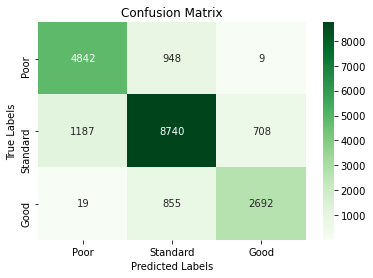

In [656]:
conf_matrix(y_test2, rf_predictions3)

In [64]:
rf4 = rf.fit(X, y.values.ravel())

In [65]:
rf_predictions4 = rf4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions4))
print(classification_report(y_test, rf_predictions4))

Accuracy: 0.8063333333333333
              precision    recall  f1-score   support

        Good       0.74      0.81      0.77      5866
        Poor       0.78      0.85      0.81      9633
    Standard       0.85      0.78      0.81     17501

    accuracy                           0.81     33000
   macro avg       0.79      0.81      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [66]:
rf5 = rf.fit(X_train1, y_train1.values.ravel())

In [67]:
rf_predictions5 = rf5.predict(X_test1)
print("Accuracy:", accuracy_score(y_test1, rf_predictions5))
print(classification_report(y_test1, rf_predictions5))

Accuracy: 0.8707330509279486
              precision    recall  f1-score   support

        Good       0.89      0.94      0.91     17491
        Poor       0.87      0.90      0.88     17613
    Standard       0.86      0.78      0.81     17539

    accuracy                           0.87     52643
   macro avg       0.87      0.87      0.87     52643
weighted avg       0.87      0.87      0.87     52643



In [68]:
rf6 = rf.fit(X_train2, y_train2.values.ravel())

In [69]:
rf_predictions6 = rf6.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, rf_predictions6))
print(classification_report(y_test2, rf_predictions6))

Accuracy: 0.8079090909090909
              precision    recall  f1-score   support

        Good       0.77      0.76      0.77      5866
        Poor       0.79      0.83      0.81      9633
    Standard       0.83      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [70]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [71]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

In [559]:
rf_tuned = RandomForestClassifier(class_weight='balanced', n_estimators=500, min_samples_split=3, max_features=10, random_state=420 )

In [560]:
rf_best_so_far = rf_tuned.fit(X_train2, y_train2.values.ravel())

In [561]:
rf_predictions10 = rf_best_so_far.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, rf_predictions10))
print(classification_report(y_test2, rf_predictions10))

Accuracy: 0.8092727272727273
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      9569
           1       0.83      0.81      0.82     17548
           2       0.77      0.77      0.77      5883

    accuracy                           0.81     33000
   macro avg       0.80      0.81      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [562]:
from xgboost import XGBClassifier

In [563]:
XGB = XGBClassifier(n_jobs=-1)

In [564]:
xgb = XGB.fit(X_train2, y_train2.values.ravel())

In [565]:
xgb_predictions = xgb.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, xgb_predictions))
print(classification_report(y_test2, xgb_predictions))

Accuracy: 0.7673333333333333
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9569
           1       0.80      0.79      0.79     17548
           2       0.69      0.72      0.70      5883

    accuracy                           0.77     33000
   macro avg       0.75      0.76      0.75     33000
weighted avg       0.77      0.77      0.77     33000



In [566]:
from sklearn.tree import DecisionTreeClassifier

In [567]:
DTC = DecisionTreeClassifier()

In [568]:
dtc = DTC.fit(X_train2, y_train2.values.ravel())

In [569]:
dtc_predictions = dtc.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, dtc_predictions))
print(classification_report(y_test2, dtc_predictions))

Accuracy: 0.7255151515151516
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      9569
           1       0.75      0.75      0.75     17548
           2       0.66      0.66      0.66      5883

    accuracy                           0.73     33000
   macro avg       0.71      0.71      0.71     33000
weighted avg       0.73      0.73      0.73     33000



In [476]:
param_grid = { 'n_estimators': [100,200,350,420] } 

In [477]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier(n_estimators=350)


In [478]:
param_grid = { 'max_depth': [None, 32, 43, 46]} 

In [479]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier()


In [480]:
param_grid = { 'min_samples_split': [3,4,5]} 

In [481]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier(min_samples_split=3)


In [482]:
param_grid = { 'max_leaf_nodes': [None, 9300, 9700]} 

In [483]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier()


In [484]:
param_grid = { 'min_samples_leaf': [1,2]} 

In [485]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier()


In [486]:
param_grid = {'max_samples' : [None, .85, .95]} 

In [487]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier()


In [488]:
param_grid = {'max_features' : [6 , 8, 10]} 

In [489]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X, y.values.ravel()) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_features=10)


In [443]:
rf_balanced1 = RandomForestClassifier(class_weight='balanced', min_samples_split = 4, random_state=420)


In [444]:
rf7 = rf_balanced1.fit(X_train2, y_train2.values.ravel())

In [445]:
rf_predictions7 = rf7.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, rf_predictions7))
print(classification_report(y_test2, rf_predictions7))

Accuracy: 0.8110909090909091
              precision    recall  f1-score   support

        Good       0.76      0.79      0.77      5866
        Poor       0.79      0.85      0.82      9633
    Standard       0.84      0.80      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.81      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [470]:
rf_balanced2 = RandomForestClassifier(class_weight='balanced', min_samples_split = 3, random_state=420)


In [471]:
rf8 = rf_balanced2.fit(X_train2, y_train2.values.ravel())

In [472]:
rf_predictions8 = rf8.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, rf_predictions8))
print(classification_report(y_test2, rf_predictions8))

Accuracy: 0.8096060606060606
              precision    recall  f1-score   support

        Good       0.77      0.77      0.77      5866
        Poor       0.79      0.84      0.81      9633
    Standard       0.83      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.81      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [473]:
rf_balanced3 = RandomForestClassifier(class_weight='balanced',min_samples_split = 5, random_state=420)


In [474]:
rf9 = rf_balanced3.fit(X_train2, y_train2.values.ravel())

In [475]:
rf_predictions9 = rf9.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, rf_predictions9))
print(classification_report(y_test2, rf_predictions9))

Accuracy: 0.8096666666666666
              precision    recall  f1-score   support

        Good       0.75      0.80      0.77      5866
        Poor       0.79      0.85      0.82      9633
    Standard       0.85      0.79      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.79      0.81      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [667]:
# !pip install pycaret

  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl (80 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached pmdarima-2.0.4-cp38-cp38-win_amd64.whl (615 kB)
  Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached pyod-2.0.1-py3-none-any.whl
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached xxhash-3.4.1-cp38-cp38-win_amd64.whl (29 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached numba-0.58.1-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached psutil-6.0.0-cp37-abi3-win_amd64.whl (257 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.

In [668]:
# ! pip freeze

absl-py==2.0.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-anon-usage @ file:///C:/b/abs_95v3x0wy8p/croot/anaconda-anon-usage_1697038984188/work
anaconda-client==1.7.2
anaconda-navigator==2.4.3
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1610472525955/work
anyio @ file:///C:/ci/anyio_1620153418380/work/dist
appdirs==1.4.4
argh==0.26.2
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1613501047216/work
astropy @ file:///C:/ci/astropy_1617745647203/work
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1615918855173/work
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.

In [664]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [665]:
s = setup(x_train_sm, target = y_train_sm,session_id = 123)

NameError: name 'setup' is not defined

In [666]:
best = compare_models()

NameError: name 'compare_models' is not defined